### Installation 
- Install tensorflow tensorflow-gpu
- Clone Mask_RCNN with git clone https://github.com/buraketmen/Mask_RCNN.git command, it will create folder named Mask_RCNN.
- Install requirements with "pip3 install /Mask_RCNN/requirements.txt" command.
- Run setup from repository folder "python3 setup.py install"
- Create model folder
- Download mask_rcnn_balloon.h5 file from https://github.com/matterport/Mask_RCNN/releases/tag/v2.1 and copy-paste it to "model" folder
- If you get error about pycocotools, install it with "pip3 install pycocotools" command

In [1]:
import os
import cv2
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

ROOT_DIR = os.path.abspath("./")
import sys
sys.path.append(os.path.join(ROOT_DIR, "Mask_RCNN"))

from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib

sys.path.append(os.path.join(ROOT_DIR, "Mask_RCNN/samples/coco/"))

import coco
from keras.engine import saving
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'model/mask_rcnn_coco.h5')
IMAGE_DIR = os.path.join(ROOT_DIR, 'Mask_RCNN/images')

In [9]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [10]:
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=ROOT_DIR)

In [11]:
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [12]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

['1045023827_4ec3e8ba5c_z.jpg', '12283150_12d37e6389_z.jpg', '2383514521_1fc8d7b0de_z.jpg', '2502287818_41e4b0c4fb_z.jpg', '2516944023_d00345997d_z.jpg', '25691390_f9944f61b5_z.jpg', '262985539_1709e54576_z.jpg', '3132016470_c27baa00e8_z.jpg', '3627527276_6fe8cd9bfe_z.jpg', '3651581213_f81963d1dd_z.jpg', '3800883468_12af3c0b50_z.jpg', '3862500489_6fd195d183_z.jpg', '3878153025_8fde829928_z.jpg', '4410436637_7b0ca36ee7_z.jpg', '4782628554_668bc31826_z.jpg', '5951960966_d4e1cda5d0_z.jpg', '6584515005_fce9cec486_z.jpg', '6821351586_59aa0dc110_z.jpg', '7581246086_cf7bbb7255_z.jpg', '7933423348_c30bd9bd4e_z.jpg', '8053677163_d4c8f416be_z.jpg', '8239308689_efa6c11b08_z.jpg', '8433365521_9252889f9a_z.jpg', '8512296263_5fc5458e20_z.jpg', '8699757338_c3941051b6_z.jpg', '8734543718_37f6b8bd45_z.jpg', '8829708882_48f263491e_z.jpg', '9118579087_f9ffa19e63_z.jpg', '9247489789_132c0d534a_z.jpg']
Processing 1 images
image                    shape: (375, 500, 3)         min:    0.00000  max:  255.0000

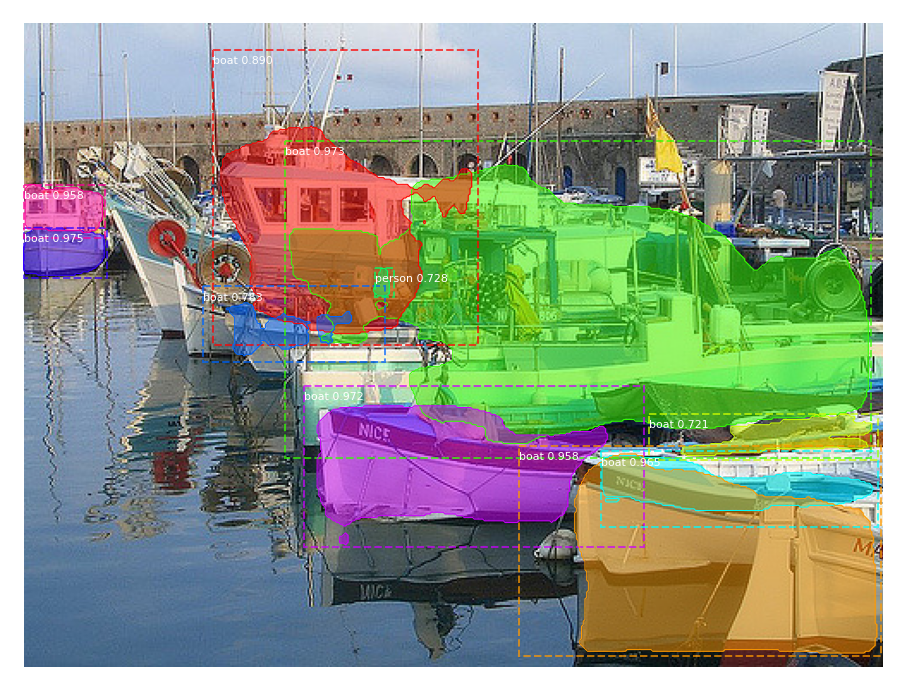

In [13]:
file_names = next(os.walk(IMAGE_DIR))[2]
print(file_names)
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
results = model.detect([image], verbose=1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])